In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data1 = pd.read_csv("/content/files/eighties_consumers.csv")

In [5]:
data1.head()

,identifier,birth_year,age,dist_lobster,num_vehicles,estimated_inc,net_worth,est_sq_ft,square_meters,est_trav_perc,est_leisure_perc,LL_passholder
0,1,1989,34,91.18,1,66284.030243,180362.510378,1719,160,0.06,0.05,0
1,2,1984,39,89.93,1,37146.803214,185973.650797,1612,150,0.06,0.05,0
2,3,1986,38,61.14,1,63331.461132,91906.403659,1610,150,0.03,0.04,0
3,4,1983,40,63.74,0,59372.865277,215498.546205,1471,137,0.09,0.05,0
4,5,1980,43,58.83,0,32000.988292,79137.328942,1472,137,0.07,0.05,0


In [9]:
data1.drop(columns=['identifier'], inplace=True)

*Identifier is seen irrelevant in the clustering model because it is a categorical variable. Clustering models rely on Euclidean distance to group data points into clusters. Since GuestID is categorical, it does not contribute to calculating Euclidean distance, thus making it unsuitable for helping in cluster formation. Therefore, it holds no relevance in the clustering model.*

In [10]:
data1.describe()

,birth_year,age,dist_lobster,num_vehicles,estimated_inc,net_worth,est_sq_ft,square_meters,est_trav_perc,est_leisure_perc,LL_passholder
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,1984.564752,38.685979,74.696198,1.102726,50573.778598,163044.582300,1499.885589,139.348588,0.056280,0.058564,0.273612
std,2.818498,2.849570,15.111465,1.048582,16124.463566,78342.803931,137.022573,12.731527,0.020519,0.012637,0.445921
min,1980.000000,34.000000,31.910000,0.000000,854.931139,-162330.370534,1038.000000,96.000000,0.020000,0.040000,0.000000
25%,1982.000000,36.000000,64.472500,0.000000,40124.008942,104034.530093,1407.250000,131.000000,0.040000,0.050000,0.000000
50%,1985.000000,39.000000,74.805000,1.000000,50529.863368,155822.711177,1498.500000,139.000000,0.060000,0.060000,0.000000
75%,1987.000000,41.000000,85.157500,2.000000,61031.147714,210997.244406,1592.000000,148.000000,0.070000,0.070000,1.000000
max,1989.000000,44.000000,134.600000,7.000000,167247.758168,506395.840222,2028.000000,188.000000,0.090000,0.080000,1.000000


In [11]:
data1.isna().sum()

,0
birth_year,0
age,0
dist_lobster,0
num_vehicles,0
estimated_inc,0
net_worth,0
est_sq_ft,0
square_meters,0
est_trav_perc,0
est_leisure_perc,0


*The dataset does not contain any NA values.*

In [12]:
data1.dtypes

,0
birth_year,int64
age,int64
dist_lobster,float64
num_vehicles,int64
estimated_inc,float64
net_worth,float64
est_sq_ft,int64
square_meters,int64
est_trav_perc,float64
est_leisure_perc,float64


In [13]:
impossible_conditions = (
    (data1['birth_year'] < 1980) & (data1['birth_year'] > 1889) |
    (data1['age'] < 0) |
    (data1['dist_lobster'] < 0) |
    (data1['num_vehicles'] < 0) |
    (data1['estimated_inc'] < 0) |
    (data1['est_sq_ft'] < 0) |
    (data1['square_meters'] < 0) |
    (data1['est_trav_perc'] < 0) |
    (data1['est_leisure_perc'] < 0) |
    ~(data1['LL_passholder'].isin([0, 1]))
)

data1['impossible'] = impossible_conditions

impossible_rows = data1[data1['impossible']]
print(impossible_rows)

cleaned_df = data1[~impossible_conditions]


Empty DataFrame
Columns: [birth_year, age, dist_lobster, num_vehicles, estimated_inc, net_worth, est_sq_ft, square_meters, est_trav_perc, est_leisure_perc, LL_passholder, impossible]
Index: []


*The dataset does not contain any inpossible values.*

In [14]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['age', 'dist_lobster', 'num_vehicles', 'net_worth', 'estimated_inc', 'est_sq_ft', 'square_meters', 'est_trav_perc', 'est_leisure_perc']

normalized_data = cleaned_df.copy()
normalized_data.drop(columns=['birth_year', 'LL_passholder'], inplace=True)


scaler = StandardScaler()

normalized_data[columns_to_standardize] = scaler.fit_transform(normalized_data[columns_to_standardize])

print(normalized_data.head())


        age  dist_lobster  num_vehicles  estimated_inc  net_worth  est_sq_ft  \
0 -1.644852      1.091080     -0.097991       0.974549   0.221107   1.599501   
1  0.110226      1.008341     -0.097991      -0.832911   0.292747   0.818418   
2 -0.240789     -0.897299     -0.097991       0.791393  -0.908258   0.803818   
3  0.461242     -0.725202     -1.051892       0.545831   0.669707  -0.210860   
4  1.514289     -1.050200     -1.051892      -1.152120  -1.071288  -0.203560   

   square_meters  est_trav_perc  est_leisure_perc  impossible  
0       1.622464       0.181318         -0.677828       False  
1       0.836821       0.181318         -0.677828       False  
2       0.836821      -1.281090         -1.469333       False  
3      -0.184515       1.643725         -0.677828       False  
4      -0.184515       0.668787         -0.677828       False  


*I've utilized Standard Scaler to transform all numeric variables into z-scores.*

*I have chosen 5 variables as input features:*

*a. dist_lobster: This variable represents the distance from each customer's residence to Lobster Land.**

*b. est_trav_perc: This variable indicates the percentage of disposable household income spent on travel.*

*c. net_worth: This variable shows the net worth of each customer.*

*d. age: This variable represents the age of the customer.*

*e. est_leisure_perc: This variable indicates the percentage of disposable household income spent on leisure activities.*



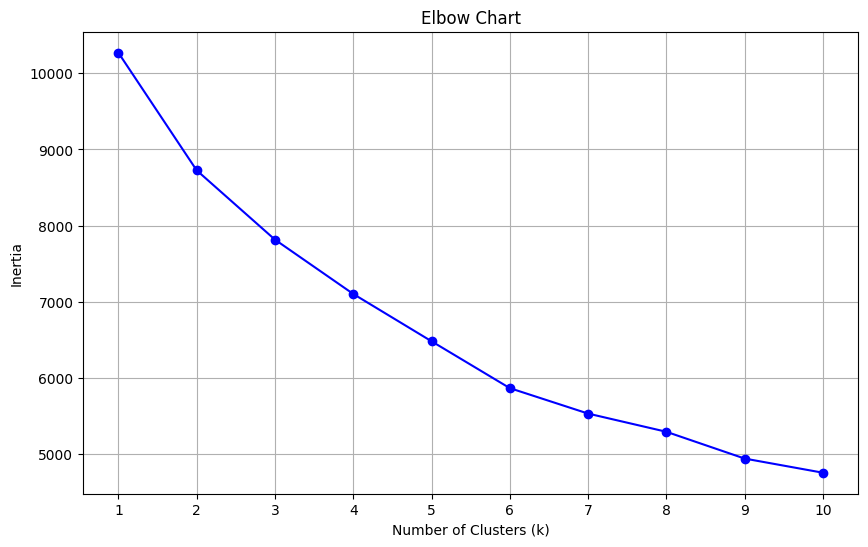

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

selected_variables = ['age', 'dist_lobster', 'net_worth', 'est_trav_perc', 'est_leisure_perc']
X_selected = normalized_data[selected_variables]

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Chart')
plt.xticks(k_values)
plt.grid(True)
plt.show()

*The elbow chart does not display a clear, distinct elbow point, making it challenging to determine the optimal number of clusters solely based on this visualization. However, it appears that either 3, 4 or 5 clusters could be suitable options, but the final decision will require building the model and evaluating its performance.*

In [16]:
import warnings
import seaborn as sns

cleaned_df1 = cleaned_df.copy()

cleaned_df1.drop(columns=['birth_year', 'LL_passholder'], inplace=True)

selected_variables = ['age', 'dist_lobster', 'net_worth', 'est_trav_perc', 'est_leisure_perc']
cleaned_df_selected = cleaned_df1[selected_variables]

scaler = StandardScaler()
scaler.fit(cleaned_df_selected)
cleaned_df_normalized = scaler.transform(cleaned_df_selected)
cleaned_df_normalized = pd.DataFrame(data=cleaned_df_normalized, index=cleaned_df_selected.index, columns=cleaned_df_selected.columns)


sse = {}
k=4
kmeans = KMeans(n_clusters=k, random_state=654)
kmeans.fit(cleaned_df_normalized)
sse[k] = kmeans.inertia_


cluster_labels = kmeans.labels_
cleaned_df_with_clusters = normalized_data.assign(Cluster=cluster_labels)


cluster_stats = cleaned_df_with_clusters.groupby(['Cluster']).agg({
    'age': 'mean',
    'dist_lobster': 'mean',
    'net_worth': 'mean',
    'est_trav_perc': 'mean',
    'est_leisure_perc': ['mean', 'count'],
}).round(2)

print(cluster_stats)


          age dist_lobster net_worth est_trav_perc est_leisure_perc      
         mean         mean      mean          mean             mean count
Cluster                                                                  
0        0.98         0.17      0.04         -0.77            -0.26   505
1       -0.77        -0.18     -0.11         -0.72             0.70   464
2        0.32         0.18     -0.02          0.93             0.66   548
3       -0.58        -0.19      0.07          0.39            -1.03   537


In [17]:
cleaned_df_with_clusters.head()

,age,dist_lobster,num_vehicles,estimated_inc,net_worth,est_sq_ft,square_meters,est_trav_perc,est_leisure_perc,impossible,Cluster
0,-1.644852,1.091080,-0.097991,0.974549,0.221107,1.599501,1.622464,0.181318,-0.677828,False,3
1,0.110226,1.008341,-0.097991,-0.832911,0.292747,0.818418,0.836821,0.181318,-0.677828,False,3
2,-0.240789,-0.897299,-0.097991,0.791393,-0.908258,0.803818,0.836821,-1.281090,-1.469333,False,3
3,0.461242,-0.725202,-1.051892,0.545831,0.669707,-0.210860,-0.184515,1.643725,-0.677828,False,3
4,1.514289,-1.050200,-1.051892,-1.152120,-1.071288,-0.203560,-0.184515,0.668787,-0.677828,False,0


*A K-means model with 4 clusters was constructed. The distinctiveness of the mean values for each variable across the 4 clusters suggests that each cluster possesses unique characteristics, indicating meaningful patterns within the data.*



<ipython-input-18-47e6305b28d2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y= 'dist_lobster', ci= None, data=cleaned_df_with_clusters)


<Axes: xlabel='Cluster', ylabel='dist_lobster'>

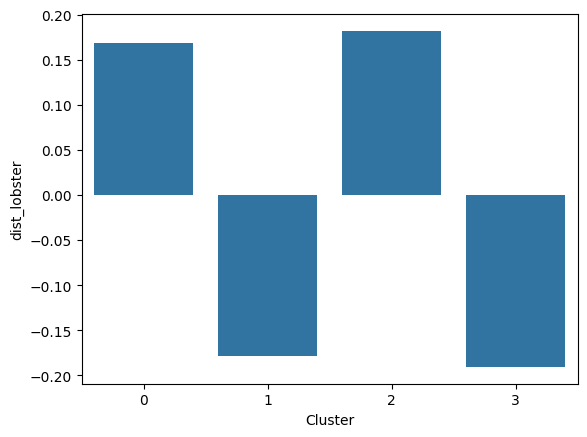

In [18]:
sns.barplot(x='Cluster', y= 'dist_lobster', ci= None, data=cleaned_df_with_clusters)

*The boxplot illustrates the distance between Lobster Land and customers within each cluster. It reveals that Cluster 0 has the longest distance from Lobster Land. Clusters 1 and 2 are relatively distant from Lobster Land compared to Cluster 0, while Cluster 3 is the closest to Lobster Land in terms of distance.*






<Axes: xlabel='age', ylabel='est_trav_perc'>

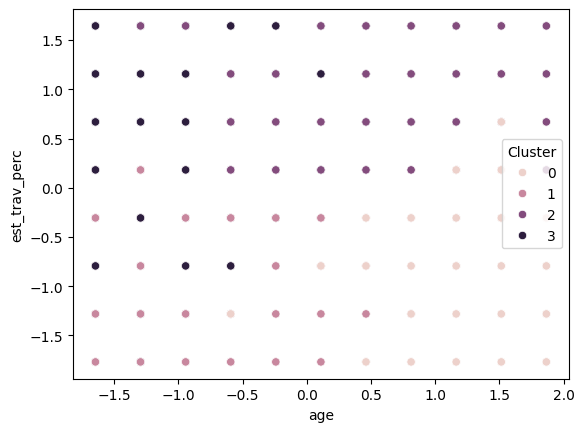

In [19]:
sns.scatterplot(x='age', y='est_trav_perc',hue='Cluster', data = cleaned_df_with_clusters)

*This scatter plot depicts the correlation between age and est_trav_perc across different clusters. Cluster 0 is characterized by lower age and average est_trav_perc. Cluster 1 shows a pattern of higher age than Cluster 0 and average est_trav_perc. In contrast, cluster 2 exhibits high age but very high est_trav_perc. Cluster 3 displays high age and an low est_trav_perc.*








<Axes: xlabel='Cluster', ylabel='net_worth'>

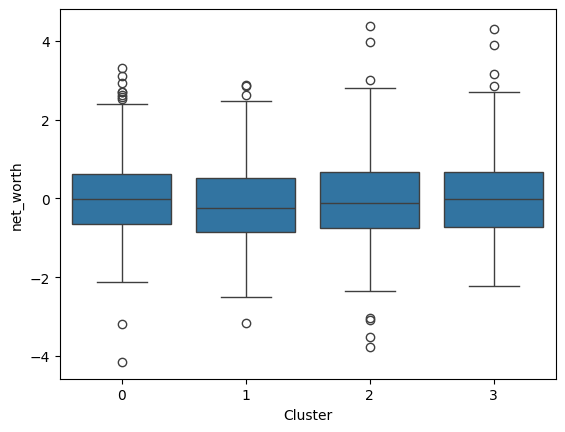

In [20]:
sns.boxplot(x= 'Cluster', y= 'net_worth', data= cleaned_df_with_clusters)

*This boxplot illustrates the distribution of net_worth across different clusters. Cluster 2 stands out with the highest net_worth compared to the other clusters. Clusters 0, 1, and 3 display comparable results with average net_worth levels.*








<ipython-input-21-5462e3c8e026>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y= 'est_leisure_perc', ci= None, data=cleaned_df_with_clusters)


<Axes: xlabel='Cluster', ylabel='est_leisure_perc'>

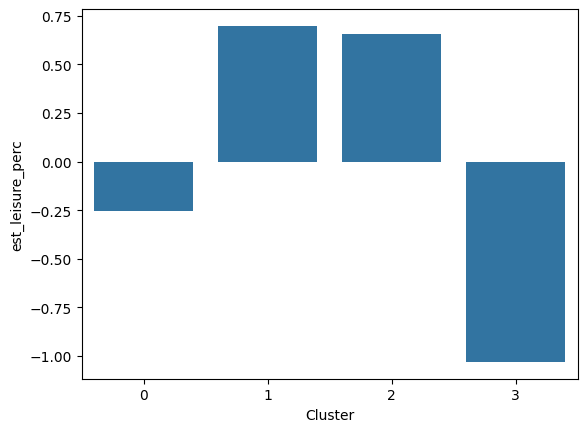

In [21]:
sns.barplot(x='Cluster', y= 'est_leisure_perc', ci= None, data=cleaned_df_with_clusters)

*This box plot displays the distribution of est_leisure_perc among different clusters. Clusters 1 exhibits high est_leisure_perc values. Cluster 2 and 3 represents an average level. Cluster 0 has the lowest est_leisure_perc.*








*Cluster 0: Homebodies- Cluster 0 includes individuals who are younger, have a low estimated travel percentage and leisure percentage, and possess a low net worth. This indicates that they are not inclined towards frequent travel or occasional relaxation activities.*

*Cluster 1: Leisure Enthusiasts- Cluster 1 consists of individuals with a lower age who exhibit a strong inclination towards leisure activities and an average estimated travel percentage. This indicates that they are individuals who enjoy leisure pursuits and occasional traveling.*

*Cluster 2: Traveling Elite- Cluster 2 comprises individuals with an average age, relatively higher net worth, and a preference for travel. This suggests that they are neither old nor young but are wealthy individuals who enjoy traveling.*

*Cluster 3:  Local Leisure Lovers- Cluster 5 comprises individuals with relatively higher age, low distance to Lobster Land, and high estimated leisure percentage. This suggests they are individuals residing close to Lobster Land who value leisure activities.*

*Cluster 0: Lobster Land can promote the concept of "staycations" by introducing special packages that encourage customers to enjoy a relaxing time in nearby surroundings. These packages may include exclusive offers on seafood delivery services,*

*Cluster 1:Lobster Land can target this cluster by offering activities and amenities that cater to the preferences of individuals who prioritize relaxation over frequent travel. This could involve creating serene environments, providing comfortable seating areas, and offering leisure-focused attractions within the park.*

*Cluster 2: Lobster Land can appeal to this customer segment by incorporating exclusive travel-themed events, offering luxury transportation options, and providing upscale amenities such as lounges and spas.*

*Cluster 3: Lobster Land can focus on this cluster by improving park accessibility and amenities. This can include convenient transportation options and local resident discounts, all of which encourage frequent visits.*

